In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
%matplotlib inline



import os
for dirname, _, filenames in os.walk('/Users/qiqi/Desktop/EE0005AI/EE0005miniprj'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Data Preparation

## 1.1 Data Exploration

In [3]:
weather_df = pd.read_csv('weatherAUS.csv')

In [4]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
weather_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## 1.2 Check the target variable (RainTomorrow)

In [6]:
# Check unique observations in the target col.
weather_df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

<font color=darkblue>**This means that the target variable contains missing values.**</font>

In [7]:
# Number of the missing values.
weather_df['RainTomorrow'].isnull().sum()

3267

In [8]:
# 加一个柱状图！！！！！！！！！

In [9]:
# Check the percentage of missing values.
weather_df['RainTomorrow'].isnull().mean()*100

2.245978275814657

<font color=darkblue>**Since it is a relatively small amount of missing value compared to the whole dataset, and it is unreasonable to fill in random values, we choose to delete rows of these missing values from the dataset.**

In [10]:
weather_df.dropna(subset=['RainTomorrow'], inplace=True)

In [11]:
# Check the percentage of missing value again.
weather_df['RainTomorrow'].isnull().mean()*100

0.0

In [12]:
weather_df.reset_index(drop=True, inplace=True) # Reindex

## 1.3 Seperating Numeric and Categorical Variables

In [13]:
# Select numeric variables
numeric = []
for cols in weather_df.columns:
    if weather_df[cols].dtype == 'float64':
        numeric.append(cols)

In [14]:
# Viewing numberic variables
weather_df[numeric].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [15]:
# Select Categorical variables
categorical = []
for cols in weather_df.columns:
    if weather_df[cols].dtype == 'object':
        categorical.append(cols)

In [16]:
weather_df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


## 1.4 Handle Categorical Data

In [17]:
# Counting missing values of each var.
weather_df[categorical].isnull().sum()  

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

### 1.4.1 Separate 'Date' into Year, Month, Day

In [18]:
# Convert the Date variable from string to date format.
weather_df['Date']=pd.to_datetime(weather_df['Date'])

In [19]:
# Creating Year, Month and Day cols in weather_df
weather_df['Year']=weather_df['Date'].dt.year
weather_df['Month']=weather_df['Date'].dt.month
weather_df['Day']=weather_df['Date'].dt.day

In [20]:
# Drop the original Date variable
weather_df.drop(columns='Date', inplace=True)

In [21]:
weather_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


### 1.4.2 Imputation of missing values in categorical data (Wind Direction & Rain Today)

#### Wind Direction

In [22]:
# Extract the three cols of Wind Direction. Then convert them to Boolean Truth Table.
Wind_truthTable = pd.concat([pd.DataFrame(weather_df['WindGustDir'].isnull()), 
           pd.DataFrame(weather_df['WindDir9am'].isnull()), 
           pd.DataFrame(weather_df['WindDir3pm'].isnull())], axis=1)
Wind_truthTable

,WindGustDir,WindDir9am,WindDir3pm
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
142188,False,False,False
142189,False,False,False
142190,False,False,False
142191,False,False,False


In [23]:
# Finding out the rows with more than 1 WindDir loss. (By Boolean Algebra.)
Over_one_missing = Wind_truthTable[(Wind_truthTable['WindGustDir']==True)*(Wind_truthTable['WindDir3pm']==True) +
                      (Wind_truthTable['WindDir3pm']==True)*(Wind_truthTable['WindDir9am']==True) +
                      (Wind_truthTable['WindGustDir']==True)*(Wind_truthTable['WindDir9am']==True)]

In [24]:
Over_one_missing.shape

(4107, 3)

In [25]:
Over_one_missing # True means that the correspond entry is missing. 

,WindGustDir,WindDir9am,WindDir3pm
63,True,False,True
64,True,True,True
181,False,True,True
289,False,True,True
515,False,True,True
...,...,...,...
141823,True,True,True
141824,True,True,True
141825,True,True,True
141826,True,True,True


<font color=darkblue>**We find that the number of rows missing two or three Wind Direction observations in the overall dataset in about 4,000, which is small compared to the entire datatset. Thus, we choose to delete these rows.**

In [26]:
# Deleting rows with 2 or 3 missing wind data.
weather_df.drop(Over_one_missing.index, inplace=True) 

In [27]:
weather_df.reset_index(drop=True, inplace=True) # Reindex

<font color=darkblue>**Now we have a clearer dataset with maximum one missing Wind data. We will process to determine how we should deal with these missing values.**

In [28]:
# Check countings of different observations in WindGustDir
weather_df.WindGustDir.value_counts() 

W      9762
SE     9300
E      9058
N      9014
SSE    8974
S      8933
WSW    8878
SW     8776
SSW    8595
WNW    8044
NW     7991
ENE    7973
ESE    7288
NE     7039
NNW    6544
NNE    6412
Name: WindGustDir, dtype: int64

In [29]:
# Check countings of different observations in WindDir9am
weather_df.WindDir9am.value_counts() 

N      11306
SE      8989
E       8965
SSE     8941
S       8421
NW      8248
W       8182
SW      8101
NNE     7926
NNW     7803
ENE     7704
ESE     7531
NE      7390
SSW     7372
WNW     7163
WSW     6801
Name: WindDir9am, dtype: int64

In [30]:
# Check countings of different observations in WindDir3pm
weather_df.WindDir3pm.value_counts() 

SE     10227
W       9882
S       9573
WSW     9309
SW      9127
SSE     9123
N       8638
WNW     8638
NW      8350
ESE     8346
E       8310
NE      8056
SSW     7992
NNW     7711
ENE     7705
NNE     6429
Name: WindDir3pm, dtype: int64

In [31]:
(weather_df['WindGustDir'] == weather_df['WindDir9am']).sum()

28053

In [32]:
(weather_df['WindGustDir'] == weather_df['WindDir3pm']).sum()

41536

In [33]:
(weather_df['WindDir9am'] == weather_df['WindDir3pm']).sum()

23235

<font color=darkblue>Since there are over 10,000 data missing, we cannot simply delete all of them. One of the common but easy method to deal with missing categorical variables is just filling them with the most frequently appeared observation. However, we find that the counting of different observartions are really close to each other, thus, we decided to use a more reasonable way to fill them, i.e., filling the missing wind direction by observations nearby. This filling mechanism also has reasonable meaning in practice, which is based on wind observations from each day.

Based on statistics, we decided to:
1. fill WindGustDir by WindDir3pm, and vice versa;
2. fill WindDir9am by WindGustDir.

In [34]:
# fill na as dicussed above
weather_df.WindGustDir=weather_df.WindGustDir.fillna(weather_df.WindDir3pm)
weather_df.WindDir3pm=weather_df.WindDir3pm.fillna(weather_df.WindGustDir)
weather_df.WindDir9am=weather_df.WindDir9am.fillna(weather_df.WindGustDir)

In [35]:
# Check number of missing values again
weather_df[['WindGustDir', 'WindDir9am', 'WindDir3pm']].isnull().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64

<font color=darkblue>**Now we have a dataset with no missing Wind data.**

#### Rain Today

In [36]:
# Check number of missing values
weather_df['RainToday'].isnull().sum()

1282

In [37]:
# Show distribution of observations
weather_df['RainToday'].value_counts()

No     106350
Yes     30454
Name: RainToday, dtype: int64

Here, since number of 'No' observations overweigh 'Yes', we choose to fill the missing values with the most frequent observation, which is 'No'.

In [38]:
# Fill missing values with the most frequent observation, i.e. 'No'
weather_df['RainToday'].fillna(weather_df['RainToday'].mode()[0], inplace=True)

In [39]:

# Check missing values again
weather_df['RainToday'].isnull().sum()

0

## 1.5 Handle Numberic Data

In [40]:
# check missing values of each numeric var
weather_df[numeric].isnull().sum()

MinTemp            267
MaxTemp            127
Rainfall          1282
Evaporation      57888
Sunshine         64367
WindGustSpeed     5492
WindSpeed9am       278
WindSpeed3pm       203
Humidity9am       1356
Humidity3pm       1841
Pressure9am      11356
Pressure3pm      11299
Cloud9am         52433
Cloud3pm         54508
Temp9am            551
Temp3pm           1011
dtype: int64

In [41]:
# check the distribution of each numeric var
round(weather_df[numeric].describe())

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,137819.0,137959.0,136804.0,80198.0,73719.0,132594.0,137808.0,137883.0,136730.0,136245.0,126730.0,126787.0,85653.0,83578.0,137535.0,137075.0
mean,12.0,23.0,2.0,5.0,8.0,40.0,14.0,19.0,69.0,51.0,1018.0,1015.0,4.0,5.0,17.0,22.0
std,6.0,7.0,8.0,4.0,4.0,14.0,9.0,9.0,19.0,21.0,7.0,7.0,3.0,3.0,7.0,7.0
min,-8.0,-5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,980.0,977.0,0.0,0.0,-7.0,-5.0
25%,8.0,18.0,0.0,3.0,5.0,31.0,7.0,13.0,57.0,36.0,1013.0,1010.0,1.0,2.0,12.0,17.0
50%,12.0,23.0,0.0,5.0,8.0,39.0,13.0,19.0,70.0,52.0,1018.0,1015.0,5.0,5.0,17.0,21.0
75%,17.0,28.0,1.0,7.0,11.0,48.0,19.0,24.0,83.0,65.0,1022.0,1020.0,7.0,7.0,22.0,26.0
max,34.0,48.0,371.0,86.0,14.0,135.0,87.0,87.0,100.0,100.0,1041.0,1040.0,9.0,9.0,40.0,47.0


In [42]:
# 画个长长的box plot

### 1.5.1 Imputation of Missing Numerical Values

In [43]:
# median imputation
for col in numeric:
    weather_df[col].fillna(weather_df[col].median(), inplace=True)

In [44]:
# check missing value after imputation
weather_df[numeric].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### 1.5.2 Process Outliers of Numerical Values

In [45]:
# 画五个的分布图

In [46]:
# find outlier boundaries
colms=['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']
for col in colms:
    IQR = weather_df[col].quantile(0.75) - weather_df[col].quantile(0.25)
    Lower = weather_df[col].quantile(0.25) - (IQR * 3)
    Upper = weather_df[col].quantile(0.75) + (IQR * 3)
    print(col+' outliers are values < {lowerboundary} or > {upperboundary}'.
          format(lowerboundary=Lower, upperboundary=Upper))

Rainfall outliers are values < -1.7999999999999998 or > 2.4
Evaporation outliers are values < -0.20000000000000107 or > 9.600000000000001
WindGustSpeed outliers are values < -14.0 or > 91.0
WindSpeed9am outliers are values < -29.0 or > 55.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


In [47]:
# replace outliers with boundary values
weather_df['Rainfall']=np.where(weather_df['Rainfall']>2.4, 2.4, weather_df['Rainfall'])
weather_df['Evaporation']=np.where(weather_df['Evaporation']>9.6, 9.6, weather_df['Evaporation'])
weather_df['WindGustSpeed']=np.where(weather_df['WindGustSpeed']>91, 91, weather_df['WindGustSpeed'])
weather_df['WindSpeed9am']=np.where(weather_df['WindSpeed9am']>55, 55, weather_df['WindSpeed9am'])
weather_df['WindSpeed3pm']=np.where(weather_df['WindSpeed3pm']>57, 57, weather_df['WindSpeed3pm'])

In [48]:
# check values after replacement
weather_df[colms].max()

Rainfall          2.4
Evaporation       9.6
WindGustSpeed    91.0
WindSpeed9am     55.0
WindSpeed3pm     57.0
dtype: float64

## 1.6 Declare Predictors and Target

In [49]:
X=weather_df.drop(columns=['RainTomorrow'])
y=weather_df['RainTomorrow']
y=pd.DataFrame(y)

## 1.7 Split Train and Test set

In [50]:
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,WNW,...,1007.7,1007.1,8.0,5.0,16.9,21.8,No,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,WSW,...,1010.6,1007.8,5.0,5.0,17.2,24.3,No,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,WSW,...,1007.6,1008.7,5.0,2.0,21.0,23.2,No,2008,12,3
3,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,E,...,1017.6,1012.8,5.0,5.0,18.1,26.5,No,2008,12,4
4,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,NW,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138081,Uluru,3.5,21.8,0.0,4.8,8.5,E,31.0,ESE,E,...,1024.7,1021.2,5.0,5.0,9.4,20.9,No,2017,6,20
138082,Uluru,2.8,23.4,0.0,4.8,8.5,E,31.0,SE,ENE,...,1024.6,1020.3,5.0,5.0,10.1,22.4,No,2017,6,21
138083,Uluru,3.6,25.3,0.0,4.8,8.5,NNW,22.0,SE,N,...,1023.5,1019.1,5.0,5.0,10.9,24.5,No,2017,6,22
138084,Uluru,5.4,26.9,0.0,4.8,8.5,N,37.0,SE,WNW,...,1021.0,1016.8,5.0,5.0,12.5,26.1,No,2017,6,23


In [51]:
y.value_counts()

RainTomorrow
No              107282
Yes              30804
dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [53]:
X_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
28679,Sydney,8.1,21.0,0.0,3.6,9.7,N,35.0,WNW,N,...,1026.5,1021.5,1.0,0.0,9.8,20.4,No,2012,7,17
62152,MelbourneAirport,4.9,15.5,0.0,4.2,6.4,N,78.0,N,N,...,1026.8,1021.0,7.0,7.0,10.2,14.3,No,2015,7,21
51331,Ballarat,3.0,16.3,0.2,4.8,8.5,N,44.0,N,N,...,1025.1,1021.9,8.0,5.0,9.3,15.9,No,2010,5,1
16793,NorahHead,21.6,28.8,0.0,4.8,8.5,NE,43.0,S,NE,...,1012.3,1008.1,5.0,5.0,23.2,24.7,No,2013,1,17
34394,WaggaWagga,9.1,19.0,0.0,4.8,6.4,SW,48.0,WNW,W,...,1010.2,1008.7,6.0,5.0,13.3,18.1,No,2011,10,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,Canberra,16.0,23.8,2.2,5.4,6.2,SSE,30.0,SE,ESE,...,1018.9,1017.1,8.0,7.0,16.5,22.9,Yes,2008,2,1
97639,Nuriootpa,6.8,14.3,0.4,4.4,1.7,WSW,33.0,WNW,WSW,...,1021.5,1020.4,8.0,8.0,8.8,12.4,No,2010,10,17
95939,MountGambier,0.9,11.3,0.0,1.4,1.5,NE,28.0,NE,ENE,...,1021.6,1017.2,7.0,7.0,4.4,10.4,No,2014,7,23
117952,SalmonGums,17.7,36.5,0.0,4.8,8.5,NNW,48.0,NNE,ENE,...,1017.6,1015.2,5.0,5.0,26.4,35.7,No,2012,1,21


In [54]:
#reindex train and test sets
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

<font color=blue>***We now finished the data preparation!***</font>

# 2. Decesion Tree

## 2.0 Label encoding of the categorial data

In [55]:
# Copy the original dataframe
X_new=X.copy()
y_new=y.copy()
X_train_new=X_train.copy()
X_test_new=X_test.copy()

In [56]:
# Label encoding 
list1=[X_train_new,X_test_new,X_new]
var_list = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']
for DF in list1:
    for var in var_list:
        labels = DF[var].unique().tolist()
        DF[var] = DF[var].apply(lambda x: labels.index(x))


In [57]:
# Check the new dataframe
X_train_new.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,0,8.1,21.0,0.0,3.6,9.7,0,35.0,0,0,...,1026.5,1021.5,1.0,0.0,9.8,20.4,0,2012,7,17
1,1,4.9,15.5,0.0,4.2,6.4,0,78.0,1,0,...,1026.8,1021.0,7.0,7.0,10.2,14.3,0,2015,7,21
2,2,3.0,16.3,0.2,4.8,8.5,0,44.0,1,0,...,1025.1,1021.9,8.0,5.0,9.3,15.9,0,2010,5,1
3,3,21.6,28.8,0.0,4.8,8.5,1,43.0,2,1,...,1012.3,1008.1,5.0,5.0,23.2,24.7,0,2013,1,17
4,4,9.1,19.0,0.0,4.8,6.4,2,48.0,0,2,...,1010.2,1008.7,6.0,5.0,13.3,18.1,0,2011,10,9
5,0,21.5,27.0,2.4,4.6,7.5,3,39.0,3,3,...,1015.1,1011.3,4.0,8.0,25.1,25.6,1,2014,2,13
6,5,25.2,33.8,0.0,5.0,11.3,4,35.0,4,4,...,1013.9,1009.5,4.0,1.0,29.9,32.3,0,2014,11,8
7,6,6.9,22.4,0.0,4.4,10.6,0,28.0,1,0,...,1014.2,1013.8,3.0,1.0,19.4,22.1,0,2009,8,26
8,5,18.7,29.4,0.0,7.8,8.7,5,48.0,4,3,...,1017.1,1013.5,7.0,7.0,20.9,28.5,0,2017,6,10
9,7,15.6,28.1,2.4,3.6,4.0,6,46.0,5,5,...,1005.9,1006.1,4.0,8.0,21.3,26.0,1,2009,11,27


## 2.1 Train the model

In [62]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

dectree=DecisionTreeClassifier(random_state=5
                                ,max_depth=30               #Randomly select a depth for decesion tree
                                #,splitter='random'
                                # ,min_samples_leaf=2
                                #,min_samples_split=15 
                                 )                          #Create the decision tree object
dectree.fit(X_train_new,y_train)

DecisionTreeClassifier(max_depth=30, random_state=5)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9995926422131296

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7751466434933739



<AxesSubplot:>

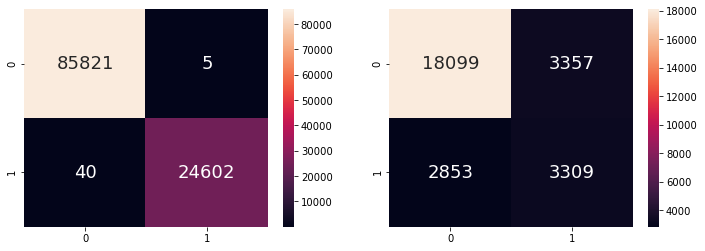

In [63]:
# Predict RainTomorrow values corresponding
y_train_pred = dectree.predict(X_train_new)
y_test_pred = dectree.predict(X_test_new)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train_new, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test_new, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))

sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

<font color=blue>**Obviously there is an issue of overfitting!**</font>

In [74]:
# Check featuer importances

# Saving feature names for later use
feature_list = list(X_train_new.columns)
# Get numerical feature importances
importances = list(dectree.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Humidity3pm          Importance: 0.2725
Variable: WindGustSpeed        Importance: 0.0654
Variable: Pressure3pm          Importance: 0.0644
Variable: Sunshine             Importance: 0.047
Variable: Humidity9am          Importance: 0.0417
Variable: MinTemp              Importance: 0.0403
Variable: Pressure9am          Importance: 0.0391
Variable: Day                  Importance: 0.038
Variable: Temp3pm              Importance: 0.036
Variable: Temp9am              Importance: 0.0359
Variable: WindSpeed3pm         Importance: 0.0322
Variable: Location             Importance: 0.0298
Variable: WindSpeed9am         Importance: 0.0295
Variable: MaxTemp              Importance: 0.029
Variable: Rainfall             Importance: 0.026
Variable: WindGustDir          Importance: 0.0247
Variable: WindDir3pm           Importance: 0.0242
Variable: Month                Importance: 0.0242
Variable: WindDir9am           Importance: 0.0238
Variable: Evaporation          Importance: 0.0235
Varia

In [69]:
# Saving feature names for later use
feature_list = list(X_train_new.columns)
feature_list

24

In [70]:
feature_importances.max(numeric_only=True)

1    0.272535
dtype: float64

RangeIndex(start=0, stop=24, step=1)

<font color=blue>***Humidity3pm is the most important feature!***</font>

0.8430733579549569 7


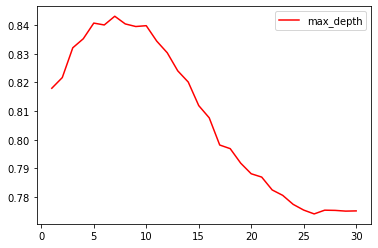

In [266]:
test = []
for i in range(30):
    dectree = DecisionTreeClassifier(max_depth=i+1
                                    ,random_state=5
                                    #,splitter="random"
                                    )
    dectree.fit(X_train_new, y_train)
    score = dectree.score(X_test_new, y_test)
    test.append(score)

print(max(test),(test.index(max(test))+1))
plt.plot(range(1,31),test,color="red",label="max_depth")
plt.legend()
plt.show()

## 2.2 Hyperparameter Tuning in Decision Trees

### 2.2.1 Max_depth (cross_validation learning curve)

<font color=blue>***In order to minimise the influence of the split of the train and test dataset, we use cross validation to observe the stability of the Decesion Tree model.***</font>

In [77]:
# Stratified K-fold cross-validation
from sklearn.model_selection import cross_val_score

# Convert the dataframe to numpy arrays. cross_val_score only accepts array or list inputs. 
X_array=X_new.to_numpy()

#labels = y_new['RainTomorrow'].unique().tolist()
#y_new['RainTomorrow'] = pd.Categorical(y_new['RainTomorrow'].apply(lambda x: labels.index(x)))

y_array=y_new.to_numpy()
y_array = y_array.flatten()
# Concvert y to 1D array

In [78]:
# Check the input array
X_array

array([[0.000e+00, 1.340e+01, 2.290e+01, ..., 2.008e+03, 1.200e+01,
        1.000e+00],
       [0.000e+00, 7.400e+00, 2.510e+01, ..., 2.008e+03, 1.200e+01,
        2.000e+00],
       [0.000e+00, 1.290e+01, 2.570e+01, ..., 2.008e+03, 1.200e+01,
        3.000e+00],
       ...,
       [4.800e+01, 3.600e+00, 2.530e+01, ..., 2.017e+03, 6.000e+00,
        2.200e+01],
       [4.800e+01, 5.400e+00, 2.690e+01, ..., 2.017e+03, 6.000e+00,
        2.300e+01],
       [4.800e+01, 7.800e+00, 2.700e+01, ..., 2.017e+03, 6.000e+00,
        2.400e+01]])

Highet Classification Accuracy 		: 0.8370944248956148
Corresponding Depth of Decesion Tree 	: 5


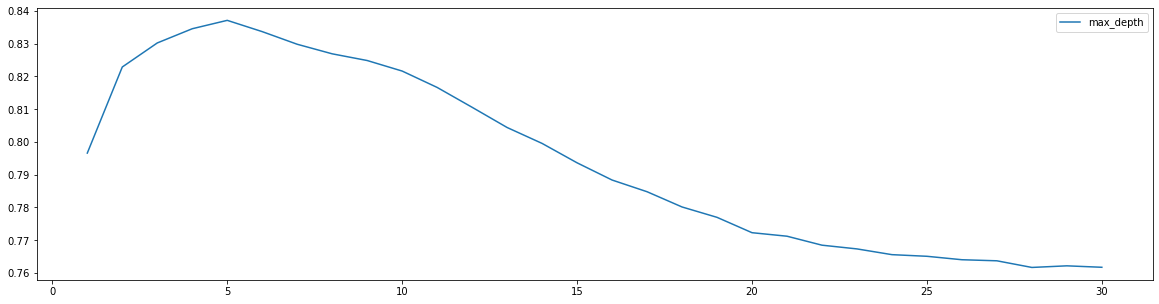

In [278]:
# Stratified K-fold cross-validation
scorelist = []
for i in range(0,30):
    dectree = DecisionTreeClassifier(max_depth=i+1
                                    ,random_state=5
                                    ,criterion='entropy'
                                    #,splitter="random"
                                    )

    score = cross_val_score(dectree,X_array,y_array,cv=10).mean()                       #cv=10 cross validation 10 times
    scorelist.append(score)


    
print("Highet Classification Accuracy \t\t:",max(scorelist))
print("Corresponding Depth of Decesion Tree \t:",(scorelist.index(max(scorelist))+1))
plt.figure(figsize=[20,5])
plt.plot(range(1,31),scorelist,label="max_depth")
plt.legend()
plt.show()

<font color=blue>***max_depth=5***</font> explain why We will use max_depth=5 in the following models

### 2.2.2 min_samples_leaf (Grid Search)

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [134]:
param_grid1 = {'min_samples_leaf':np.arange(1,101,5)}             # min_samples_leaf(default=1)

dectree = DecisionTreeClassifier(max_depth=5
                                ,random_state=5
                                ,criterion='entropy'
                                #,splitter="random"
                                    )


GS = GridSearchCV(dectree, param_grid1, cv=10)
GS.fit(X_array,y_array)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                              random_state=5),
             param_grid={'min_samples_leaf': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])})

In [135]:
GS.best_params_

{'min_samples_leaf': 11}

In [136]:
GS.best_score_

0.8371016670740621

<font color=blue>***min_samples_leaf=11***</font>explain why We will use min_samples_leaf=11 in the following models.

### 2.2.2 min_samples_split (Grid Search)

In [128]:
param_grid2 = {'min_samples_split':np.arange(1,21)}              # min_samples_split(default=2)
dectree = DecisionTreeClassifier(max_depth=5
                                ,min_samples_leaf=11
                                ,random_state=5
                                ,criterion='entropy'
                                #,splitter="random"
                                    )


GS = GridSearchCV(dectree, param_grid2, cv=10)
GS.fit(X_array,y_array)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                              min_samples_leaf=11,
                                              random_state=5),
             param_grid={'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])})

In [129]:
GS.best_params_

{'min_samples_split': 2}

In [130]:
GS.best_score_

0.8371016670740621

### 2.2.2 max_features (Grid Search)

In [131]:
# Set the range for max_features to apply Grid Search
param_grid3 = {'max_features':[None, 'log2','sqrt']}        # max_features(default=None, max_features=n_features)
                                                            # For this dataset, n_feature=24
                                                            # If “sqrt”, then max_features=sqrt(n_features)
                                                            # If “log2”, then max_features=log2(n_features)
dectree = DecisionTreeClassifier(max_depth=5
                                ,random_state=5
                                ,min_samples_leaf=11
                                ,criterion='entropy'
                                #,splitter="random"
                                    )


GS = GridSearchCV(dectree, param_grid3, cv=10)
GS.fit(X_array,y_array)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                              min_samples_leaf=11,
                                              random_state=5),
             param_grid={'max_features': [None, 'log2', 'sqrt']})

In [132]:
GS.best_params_

{'max_features': None}

In [133]:
GS.best_score_

0.8371016670740621

## 2.3 Conclusion for Decision tree

In [1]:
print('Event rate =',30804/138086*100,'%')

Event rate = 22.30783714496763 %


>Total Observations = 138086

>No  = 107282

>Yes = 30804

>Event Rate = 22.308%

<font color=darkblue>Classifier algorithms like Decision Tree has a bias towards classes which have number of instances. They tend to only predict the majority class data. Thus, there is a high probability of misclassification of the minority class as compared to the majority class(as shown in the confusion matrix of the test data in the beginning). It is common to classify a dataset with classes ratio smaller than 1:4 as an imbalanced dataset. In our case, the ratio is about 0.287>1/4. Neverthless, we still decide to balance the dataset using class_weight.

In [ ]:
f, axes = plt.subplots(1, 4, figsize=(20, 10))
balance_method=[None,'balanced',{'No': 1, 'Yes': 1},{'No': 30804, 'Yes': 107282}]
i=0
for method in balance_method:
    dectree = DecisionTreeClassifier(max_depth=8                
                                ,min_samples_leaf=6         
                                ,random_state=5
                                ,max_features=96
                                ,criterion='entropy'
                                #,splitter="random"
                                ,class_weight=method)
    
    dectree.fit(X_train,y_train)
    print('balance method:\t\t\t\t',method)
    print('Classification accuracy:\t\t',cross_val_score(dectree,X_train_array,y_train_array,cv=10).mean())
    y_test_pred = dectree.predict(X_test)

    sb.heatmap(confusion_matrix(y_test, y_test_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[i])
    i=i+1

# 你俩从这里写，后头那部分你们应该用了会卡死

In [58]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [69]:
rfc = RandomForestClassifier(random_state=50
                            ,n_estimators=186
                            #,criterion='entropy'
                            ,oob_score=True
                             )     
rfc.fit(X_train_new,y_train) 

RandomForestClassifier(n_estimators=186, oob_score=True, random_state=50)

In [70]:
#rfc.score(X_test_new, y_test)
rfc.oob_score_                       #out of bag data

0.8562027012347467

In [80]:
# Check featuer importances

# Saving feature names for later use
feature_list = list(X_train_new.columns)
# Get numerical feature importances
importances = list(rfc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Humidity3pm          Importance: 0.1619
Variable: Pressure3pm          Importance: 0.0575
Variable: WindGustSpeed        Importance: 0.0539
Variable: Sunshine             Importance: 0.0533
Variable: Pressure9am          Importance: 0.0527
Variable: Humidity9am          Importance: 0.0498
Variable: Rainfall             Importance: 0.0459
Variable: Temp3pm              Importance: 0.0451
Variable: MinTemp              Importance: 0.0432
Variable: MaxTemp              Importance: 0.0411
Variable: Temp9am              Importance: 0.0405
Variable: Cloud3pm             Importance: 0.0377
Variable: Day                  Importance: 0.0325
Variable: WindSpeed3pm         Importance: 0.0316
Variable: Location             Importance: 0.0306
Variable: WindSpeed9am         Importance: 0.0293
Variable: WindDir3pm           Importance: 0.0271
Variable: WindGustDir          Importance: 0.0263
Variable: WindDir9am           Importance: 0.0259
Variable: Month                Importance: 0.0236


In [62]:
X_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,Sydney,8.1,21.0,0.0,3.6,9.7,N,35.0,WNW,N,...,1026.5,1021.5,1.0,0.0,9.8,20.4,No,2012,7,17
1,MelbourneAirport,4.9,15.5,0.0,4.2,6.4,N,78.0,N,N,...,1026.8,1021.0,7.0,7.0,10.2,14.3,No,2015,7,21
2,Ballarat,3.0,16.3,0.2,4.8,8.5,N,44.0,N,N,...,1025.1,1021.9,8.0,5.0,9.3,15.9,No,2010,5,1
3,NorahHead,21.6,28.8,0.0,4.8,8.5,NE,43.0,S,NE,...,1012.3,1008.1,5.0,5.0,23.2,24.7,No,2013,1,17
4,WaggaWagga,9.1,19.0,0.0,4.8,6.4,SW,48.0,WNW,W,...,1010.2,1008.7,6.0,5.0,13.3,18.1,No,2011,10,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110463,Canberra,16.0,23.8,2.2,5.4,6.2,SSE,30.0,SE,ESE,...,1018.9,1017.1,8.0,7.0,16.5,22.9,Yes,2008,2,1
110464,Nuriootpa,6.8,14.3,0.4,4.4,1.7,WSW,33.0,WNW,WSW,...,1021.5,1020.4,8.0,8.0,8.8,12.4,No,2010,10,17
110465,MountGambier,0.9,11.3,0.0,1.4,1.5,NE,28.0,NE,ENE,...,1021.6,1017.2,7.0,7.0,4.4,10.4,No,2014,7,23
110466,SalmonGums,17.7,36.5,0.0,4.8,8.5,NNW,48.0,NNE,ENE,...,1017.6,1015.2,5.0,5.0,26.4,35.7,No,2012,1,21


Highet Classification Accuracy 		: 0.8569449807409393
Corresponding Depth of the Tree 	: 201


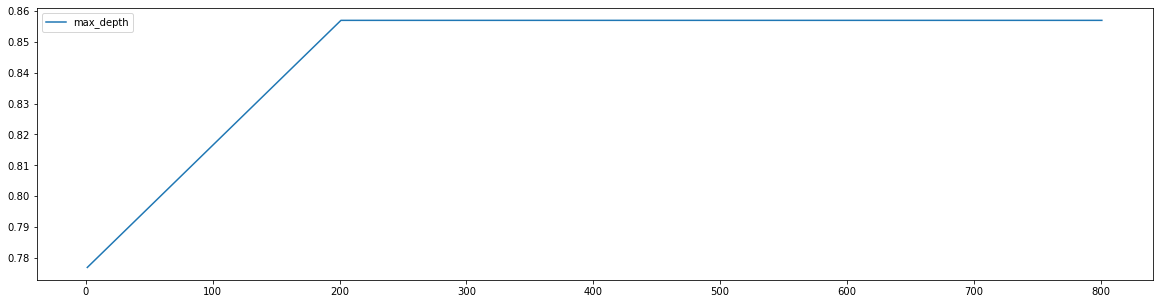

In [59]:
scorelist1 = []
for i in range(0,1000,200):
    rfc = RandomForestClassifier(max_depth=i+1
                                ,random_state=50
                                ,n_estimators=186
                                ,n_jobs=-1
                                )

    score = cross_val_score(rfc,X_train_new,y_train,cv=10).mean()                       #cv=10 cross validation 10 times
    scorelist1.append(score)


    
print("Highet Classification Accuracy \t\t:",max(scorelist1))
print("Corresponding Depth of the Tree \t:",(scorelist1.index(max(scorelist1))*200+1))
plt.figure(figsize=[20,5])
plt.plot(range(1,1001,200),scorelist1,label="max_depth")
plt.legend()
plt.show()

# 4. Logistic Regression

## 4.1 One Hot Encoding of Categorical Variables

In [ ]:
# RainToday
pd.get_dummies(weather_df.RainToday).head()
# This is just an illustration of the result of One Hot Encoding.


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse=False)

var_list = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']

# One hot encode X_train
for var in var_list:
    X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[[var]]))
    X_train_encoded.columns = encoder.get_feature_names([var])
    X_train.drop([var] ,axis=1, inplace=True)
    X_train=pd.concat([X_train_encoded, X_train], axis=1)
    
X_train

In [ ]:
# One hot encode X_test
for var in var_list:
    X_test_encoded = pd.DataFrame(encoder.fit_transform(X_test[[var]]))
    X_test_encoded.columns = encoder.get_feature_names([var])   
    X_test.drop([var] ,axis=1, inplace=True)
    X_test=pd.concat([X_test_encoded, X_test], axis=1)

<font color=darkblue>**Now we finished one hot encoding to the categorical variables**